Импорт библиотек. (Логичней было бы поставить его в начале разбора, но я не знаю, как лучше)

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from plotly import graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

import statsmodels.api as sm

import seaborn as sns

import scipy.stats as stats

from scipy.stats import chi2_contingency

%matplotlib inline

Дополнительные настройки

In [57]:
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid", {'axes.grid' : False})

#  Домашняя работа по EDA 

### EDA

Подход EDA - это именно то, что - подход - не набор методов, а отношение/философия о том, как должен проводиться анализ данных.

Что я планирую сделать в этом ноутбуке

    1. Понимание проблемы. Мы посмотрим на каждую переменную и посмотрим, её важность для решаемой нами проблемы
    2. Univariable study. Я сфокусируюсь на целевой переменной (y) и попробую узнать про нее немного больше. 
    3. Multivariate study. Мы попробуем понять, какие взаимосвязи существуют между зависимымы и независимой переменными. 
    4. Базовая очистка. Я почищу датасет, чтобы обработать пропущенные значения, выбрасы, и категориальные фичи.
    5. Тест предположений. Я проверю основные предположение, которые требуются большинством Multivariate study техник.


## Обзор 

В этой задачи, я буду рассматривать датасет про телефонный банковский маркетинг португальского банковского института, то есть про телефонные звонки из или в банк в Португалии. В этом датасете целевой переменной является оформит ли клиент банковские долгосрочные вклады. 

Датасет основан на UCI(University of California, Irvine) датасете "Bank Marketing". [UCI](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

В июне 2014 года, в журнале "Decision Support Systems" вышла статья от авторов Sérgio Moroa, Paulo Cortezb, Paulo Ritaa под заголовком "A data-driven approach to predict the success of bank telemarketing", где рассказывалось о создании данного датасета и последующей работы с ним. 

Им был нужен датасет для исследовании баковского телефоного маркетинга с целью предсказать продажи банковских долгосрочных вкладов. Они связались с Португальским **розничным** банком, который предоставил им данные собранные **с 2008 по 2013** года, в которых также набюдался эффект от **финансового кризиса** тех лет.

**То есть, все данные были полученны во время Мирового Финансового Кризиса.**


### Финансовый криз

В статье упоминается Мировой экономический кризис с 2008. Я преведу лишь общее описание, того что случилось в эти годы, для лучшего понимания, что происходило в эти годы. Интересно посмотреть, как кризис повлиял на спрос на долгосрочные банковские депозиты, но я думаю, что для такого анализа, нам потребуются дополнительные данные, так как в этом датасете нет данных по дате. 

Мировой экономический кризис — кризисное состояние мировой экономики, резко обозначившееся с 2008 года. Разные страны и регионы выходили из острой фазы кризиса в разное время, с 2009 по 2013 год, а его последствия сохраняются поныне. Развился с финансового кризиса, начавшегося в США. Если не по глубине, то по масштабам и последствиям сопоставим лишь с Великой депрессией 1930-х годов. В 2009 году мировой ВВП впервые со времён Второй мировой войны показал отрицательную динамику.

Также рекордно (более чем на 10 %) сократилась мировая торговля, восстановившая объём к 2011 году, но до сих пор значительно отстающая от докризисных темпов роста.

Спад экономики США и еврозоны закончился во втором квартале 2009 года, однако в 2011 году в еврозоне началась вторая рецессия, продолжавшаяся до 2013 года и ставшая самой длительной в её истории.

Глобальной тенденцией после острой фазы кризиса в 2008 году стало ослабление среднего класса в мире, в то время как до кризиса его доля в общем объёме мирового богатства оставалась продолжительное время стабильной, отмечается в отчёте «Global Wealth Report 2015» швейцарского банка «Credit Suisse». При этом доля 1 % самых богатых людей в мировом объёме богатств превысила 50 % и продолжает увеличиваться.

Беспрецедентный рост безработицы привёл к достижению её рекордного показателя за всю историю наблюдений за рынком труда (200 млн человек в 2009 году).



### Розничный банк

Розничное банковское обслуживание, также известное как потребительское банковское обслуживание, представляет собой оказание банком услуг широкой общественности, а не компаниям, корпорациям или другим банкам, которые часто называют оптовым банковским обслуживанием. Банковские услуги, которые рассматриваются как розничные, включают предоставление сберегательных и операционных счетов, ипотечных кредитов, личных кредитов, дебетовых карт и кредитных карт. Розничный банкинг также отличается от инвестиционного банкинга или коммерческого банкинга. Это также может означать подразделение или отдел банка, который имеет дело с индивидуальными клиентами.

### Маркетинговые кампании

Маркетинговые торговые кампании представляют собой типичную стратегию по расширению бизнеса.Компании используют прямой маркетинг, ориентируясь на сегменты клиентов, связываясь с ними для достижения конкретной цели. Централизация удаленного взаимодействия с клиентами в контакт-центре упрощает оперативное управление кампаниями. Такие центры позволяют общаться с клиентами по различным каналам, одним из наиболее широко используемых является телефон (стационарный или мобильный). Маркетинг, осуществляемый через контакт-центр, называется телемаркетингом из-за характеристики удаленности. Контакты могут быть разделены на входящие и исходящие, в зависимости от того, какая сторона инициировала контакт (клиент или контактный центр), при этом каждый случай создает различные проблемы (например, исходящие из банка звонки, часто считаются более нежелательными для клиента). Технология позволяет переосмыслить маркетинг, сосредоточив внимание на максимизации длинны взаимодействия с клиентом за счет оценки доступной информации и показателей клиента, что позволяет создавать более длительные и тестные отношения в соответствии с бизнес-спросом. 
 
Кроме того, следует подчеркнуть, что задача выбора лучшего набора клиентов, т.е. тех, которые более склонны подписываться на продукт, описывается как NP-hard в статье "Optimization modelsfor targeted offers in direct marketing: Exact and heuristic algorithms" от 2011 года.



### Банковские данные телемаркетинга

В рамках кампании операторы звонят по списку для продажи депозита (исходящий) или, если клиент звонит в контакт-центр по какой-либо другой причине, его просят подписаться на депозит (входящий). Таким образом, результатом является бинарный неудачный или успешный контакт.

Тут мы можем понять, что банк уже имел информацию о клиентов, получив ее предыдидущими взаимодействиями с ними, или, вероятно, каким-нибудь другим способом.

### Банковский долгострочный депозит

К сожалению в датасете нет описание, какие были предлагаемые условия депозита, менялись ли они в зависимости от клиентов и от времени. Было бы интересно посмотреть на целевую переменную, в зависимоти от различных условий вклада, но так как такой информации нет. Так же у нас нет информации о операторе звонка, его пола и опыта.

В связи с этим я буду считать за банковский депозит, депозит на длительное время с неопределенными условиями от неизвестного оператора.


#### О вкладе
Долгосрочные вклады в банках по сути относятся к стратегическим сбережениям и открываются в банке от года и более. Наряду с повышенными процентами, которые гарантируют пассивный доход, они несут и повышенные риски. Известны такие случаи, когда долгосрочные вклады в банках хранились больше десятка лет.


## Отбор переменных

Для нашего анализа также интересно, каким образом выбирались переменные для исследования, о котором было рассказано в статье. Я опишу это кратко, так как более детельно все расписано в самой статье. 

Для отбора фич использовался полуавтоматический метод. Был привлечен эксперт из области банковского маркетинга, и точно определены цели последующего исследования. То есть вопросы, на которые исследователи хотели ответить при помощи данных. Ниже я приведу список вопросов. К сожалению в статье не описано, какие точно переменные были выбраны для тех или иных вопросов. 

|  Вопрос | Число переменных  |
|:---|---|
|1. Релевантен ли предлагаемый тариф?   |  5 |
|2. Релевантен ли пол?  | 3 |
|3. Важен ли опыт оператора?   |  3 |
|4. Релевантны ли социальный статус и стабильность?| 5 |
|5. Релевантны ли отношения между клиентом и банком?| 11 |
|6. Релевантны ли блоки банки (Ограничения на провеведение некоторых операций)? | 6|
|7. Релевантент ли контекст телефонного звонка? |4|
|8. Релевантны ли дата и время? | 3|
|9. Релевантны ли показатели профилирования банков?|7|
|10. Релевантны ли социально-экономические показатели? |11| 
|11. Являются ли финансовые активы релевантными?| 3|
|12. Является ли район проживания актуальным?| 1 |
|13. Может ли возраст быть связан с продуктами с более длительными периодами?|3|
|14. Релевантны ли хиты веб-страниц (для кампаний, отображаемых на веб-сайтах банков)?| 4 |
|--------------------|-------------------------|
|Количество фичей после выбора бизнес-знаний| 69 |
|Количество фичей после первой фазы выбора элемента|22| 

Как мы увидим далее, многие из этих вопросов так и не были представленны в датасете, в связи с тем, что он, в основном, содержит информацию о клиенте, компании и социальной обстановки

#### Дополнение

Датасет был обогащен добавлением пяти новых социально-экономических признаков/атрибутов (общегосударственные показатели из страны с населением ~10 млн человек), опубликованных банком Португалии и общедоступных по адресу: https://www.bportugal.pt/estatisticasweb.

# Список всех переменных в датасете (без перевода на русский)

## Input variables:

   **bank client data:**
   
    Основное описание клиента, видимо основанное на данных, которые предоставил клиент в банк, или полученное из других источников.
    
    1. age (numeric)
    2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
    3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
    4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
    5. default: has credit in default? (categorical: "no","yes","unknown")
    6. housing: has housing loan? (categorical: "no","yes","unknown")
    7. loan: has personal loan? (categorical: "no","yes","unknown")
   
   **related with the last contact of the current campaign:**
   
       Информация, связанная с последним контактом в рекламной компании.
   
    8. contact: contact communication type (categorical: "cellular","telephone") 
    9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
    11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   
   **other attributes:**
   
       Информация о самой компании
   
    12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14. previous: number of contacts performed before this campaign and for this client (numeric)
    15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
  **social and economic context attributes**
  
      Социальный и экономической контекст
  
    16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17. cons.price.idx: consumer price index - monthly indicator (numeric)     
    18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
    19. euribor3m: euribor 3 month rate - daily indicator (numeric)
    20. nr.employed: number of employees - quarterly indicator (numeric)

## Output variable (desired target):

    21. y - has the client subscribed a term deposit? (binary: "yes","no")

Разбор переменных ниже, сначала я хочу подгрузить датасет, и посмотреть его основные показатели

**Примечание**

Мы знаем, из текста приложенного к датасету, что это выборка из выборки. 

# Смотрим датасет 

In [3]:
df = pd.read_csv('data/row/bank-additional-full.csv', sep=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
print("Shape of training data :", df.shape)

Shape of training data : (41188, 21)


Как мы видим, в датасете 21 фича и 41188 наблюдений

Из приложенной информации к датасету 

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

In [6]:
df.isin(["unknown"]).sum(axis=0)

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

**ВЫВОД**

Скорее всего люди неохотно расскрывают информацию о том, если у них кредит или нет 

In [16]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Разберем переменные подробней


## Bank client data

В этой группе представленны демографические характеристике, который или позвонил в банк, или был набран банком.

Все переменные этой группы являются категориальными, кроме возраста.  

### Age

Чтобы было можно наглядней посмотреть на зависимость между согласием открыть долгосрочный вклад и возрастом - разделим по возраст на демографические группы. Думаю, будет интересней, если не просто разбить на интервалы по разному возрасту, а посмотреть на разные поколения. То есть, нам будут интересны хронологические поколнения. 

Поколение - это объединение людей в границах конкретного возрастного интервала. 

Хронологическое поколение - совокупность людей, жизнедеятельность которых проявляется в данный момент времени.

[Статья про разницу между поколениями](https://prostudio.ru/journal/generation-x-y-z/)

В начале проверим, есть ли у нас странные записи, в которых возраст человека меньше 18 лет.

You must be aged at least 18 and provide proof of identity (e.g. a passport), your address in Portugal and your fiscal number. 

[Статья про требования в португальских банках](https://www.justlanded.com/english/Portugal/Portugal-Guide/Money/Accounts)

In [7]:
df[df['age'] < 18]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,432,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,182,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,92,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,498,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,896,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes


Как мы видим, есть 5 таких звонков. Особенно интересный звонок под id = 39274, у студента уже был займ. 

**Мое предположение такое, что студенты сами звонили в банк, с просьбой открыть депозит. Но по фиче pdays мы видим, что в 3 из 5 случаев, это не было первым звонком в банк или из банка.** 

Проверим, как распределена эта величина, построив гистограмму

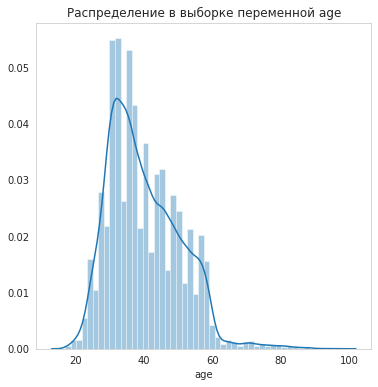

In [58]:
plt.figure(figsize=(6,6))
sns.distplot(df["age"])
plt.title('Распределение в выборке переменной age')
plt.show()

Так как у нас не может быть людей моложе 18 лет, и мало кто доживает до 100, то можно взять за приблизетельный средний возраст 40 лет. Из граффика видно, что в данную выборку попало больше людей 30 летнего возраста. Мы видим, что граффик немного похож на нормальное распределение. Он унимодален, и skewed в правую сторону. 

Можно сравнить эти данные с демографическим показателеми Португалии за эти года. 

#TODO: Если успею, то поищу датасет с этими данными 

Для проверки на нормальность построю QQ плот, так как объем выборки большой 

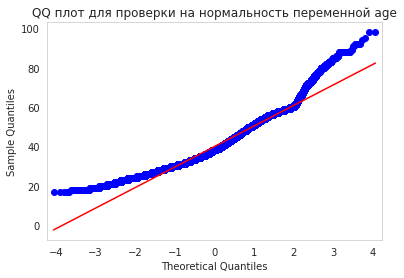

In [78]:
sm.qqplot(df['age'], line='s')
plt.title('QQ плот для проверки на нормальность переменной age')
plt.show()

**Вывод**

Видим, что переменная распределена не нормально, концы очень тяжелые 

Так как у нас нет данных, для того, чтобы точно определить в каком году был совершен звонок, я думаю взять среднее годов, когда собирались данные. В данном случае это не целое число, поэтому округлю.

In [8]:
year = round(np.mean([2008,2013]))
print(f'Средний год звонка клиенту - {year}')

Средний год звонка клиенту - 2010


|Название поколнения | года |
|--------------|-----------|
|Молчаливое поколение | 1925 – 1944|
|Поколение бэби-бумеров | 1944 – 1967|
|Поколение Х (икс) | 1967 – 1984|
|Поколение Y (игрек) или миллениалы | 1984 – 2000|
|Поколение Z (зет) или зумеры | 2000 – 2015|
|Поколение A (альфа) | c 2011 |

Поколения Z и A нас не интересуют, так как они не достигли совершеннолетия, чтобы открыть депозит в банке. 

In [9]:
bins = pd.IntervalIndex.from_tuples([ (year - 2000, year - 1984 ),(year - 1984, year - 1967),( year - 1967, year - 1944), (year - 1944, year - 1925)])
d = dict(zip(bins,['Millenial', 'GenX', 'BabyBoom', 'Silent' ]))
df['Generation'] = pd.cut(df['age'], bins = bins, right = True).map(d)

Посмотрим на абсолютное число значений людей, с которыми связался банк, или которые сами с ним связались, разделенное на поколения

In [87]:
fig = go.Figure(px.funnel(
    y =df['Generation'].value_counts().index,
    x = df['Generation'].value_counts(),
    title = "Распределение поколений в выборке в абсолютных значениях"
    ))

fig.show()

По этому граффику видно, что самое большое число людей, которые вступали в связь с банком, приходится на поколение X. На втором месте БейбиБумеры. В целом можно сказать, что большую часть выборки составляют люди 20и 30и 40а лет.

In [101]:
ct_gg = pd.crosstab(df['y'], df['Generation'])
ct_gg_m = pd.crosstab(df['y'], df['Generation'], margins=True, margins_name='Total')
ct_gg_m

Generation,Millenial,GenX,BabyBoom,Silent,Total
y,,,,,
no,1893,22337,12017,280,36527
yes,471,2542,1366,239,4618
Total,2364,24879,13383,519,41145


Та же таблица, но в процентах

In [102]:
ct_gg_p = pd.crosstab(df['y'], df['Generation'] , normalize='index')
ct_gg_pm = pd.crosstab(df['y'], df['Generation'], margins=True, margins_name='Total', normalize='index')
ct_gg_pm

Generation,Millenial,GenX,BabyBoom,Silent
y,,,,
no,0.051825,0.611520,0.328990,0.007666
yes,0.101992,0.550455,0.295799,0.051754
Total,0.057455,0.604666,0.325264,0.012614


**Вывод** 

Большинство вкладов было открыто людьми из поколения X (Поколение Х (икс) 1967 - 1984). То есть люди в возрасте от 26 до 42 лет. На втором месте БейбиБумеры (Поколение бэби-бумеров 	1944 – 1967) то есть, люди старшего возраста.

In [104]:
fig = px.funnel(ct_gg.stack().reset_index(), x=0, y='Generation', color='y', title = "Распределение тех кто открыл депозит и тех кто не открывал по поколениям в абс. значениях")
fig.show()

Кросс таблица по группам поколений и тех кто открывал\неоткрывал депозит в банке

In [135]:
ct_gg_g = pd.crosstab(df['y'], df['Generation'] , normalize='columns')
ct_gg_g

Generation,Millenial,GenX,BabyBoom,Silent
y,,,,
no,0.800761,0.897825,0.89793,0.539499
yes,0.199239,0.102175,0.10207,0.460501


Построим граффик абсолютных значений, тех кто открыл в банке вклад, или был в контакте с банком и не открыл вкад, в разрезе поколений. 

Построим граффик процентных значений, тех кто открыл в банке вклад, или был в контакте с банком и не открыл вкад, в разрезе поколений.


In [142]:
fig = px.funnel(ct_gg_g.stack().reset_index(), x=0, y='Generation', color='y', title = "Процентное отношение открытых вкладов к неоткрытым вкладом в срезе поколений")
fig.show()

**ВЫВОД**

Видим, что охотнее всего, вклады в банке открывают люди старшего поколения с очень большим отрывом. Не будем забывать о том, что данные предоставлены за период Мирового Экономического кризиса. 


Millenial - В общем количестве их не так много, всего 2364, что составляет 0.05% от всех, кто участвовал. Поэтому, чтобы судить о том, что они делают депозиты чаще (о чем можно судить по графику выше), нужно провести тест. 

GenX - их большинство в выборке, почти 25 000. Что составляет 60%. Делают депозиты из них только 10%

BabyBoomers - 13.383 в выборке, что составляет 32%. Как и люди из поколения X, только 10% из них сделало вклады (В этом банке) 

Silent - Их в выборку попало совсем немного, всего 519 человек. Что составило 1%. Но они охотней всего делали вклады после связи с банком - 46% из них. 


#TODO посмотреть, зачем пожилому поколению депозиты. 

# Job (фича)

Категориальная фича, что сообщили люди о своей работе. Если человек не рассказывал про работу, или значение пропущено, то стоит категория "unknow".

Построим кросс таблицу с процентами, чтобы посмотреть, как работа связана с открытие депозита. 

In [167]:
ct_jy_j = pd.crosstab(df['y'], df['job'] , normalize='columns')
ct_jy_js = ct_jy_j.style.background_gradient(cmap=cm, axis = 1)
ct_jy_js

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,0.870274,0.931057,0.914835,0.900000,0.887825,0.747674,0.895144,0.918619,0.685714,0.891740,0.857988,0.887879
yes,0.129726,0.068943,0.085165,0.100000,0.112175,0.252326,0.104856,0.081381,0.314286,0.108260,0.142012,0.112121


**Наблюдение**

Тогда как все профессии показали примерно одни и те же результаты, выделяются две группы - student и retired. Retaired не очень интересно, так как предпологаю, что в ней много людей пожилового возраста из поколения Silent, которые довольно охотно оформляют депозит (Если успею, то я повнимательней присмотрюсь к этой группе). Интересна профессия студент. Так как видно, что они открывают депозит в три раза чаще. Предпологаю, что дело в том, что у студентов еще нет своего депозита в других банках и они охотней говотовы начать копить сбережения. 

Переменная, чтобы подсветить crosstable 

In [154]:
cm = sns.light_palette("green", as_cmap=True)

Построим crosstable для поколений и работ

In [155]:
ct_jy_g = pd.crosstab([df['y'] , df['Generation']], df['job'] , normalize='columns')

In [157]:
ct_jy_s = ct_jy_g.style.background_gradient(cmap=cm)
ct_jy_s

_Не понял, как оформить индексы, чтобы было более очевидно где "да" и "нет"_

**Наблюдение**

Удивительной большой процент отказывающихся открыть вклад по всем профессиям приходиться на поколение X. И затрагивает поколение BabyBoomer`ов. Но у этих двух поколений и так самый большой процент отказов, что показало нам исследования поколений. 

Интересно то, что значительно меньше отказов в поколении X у ретейлоров. Думаю, они лучше всего обученны правильно распоряжаться своими финансами. Хотя могут быть и другие причины.

Так же интересно, что у студентов милиниалов самый большой отказ от открытия депозита, и самое большой процент согласия на открытие. Но думаю, это связано с тем, что ими активно интересуются все банки, для открытия депозита, и предпологаю большую конкуренцию. Но может быть дело в том, что их совсем мало в выборке и поэтому точных выводов я бы не делал. 

In [274]:
def chi_squred(table):
    stat, p, dof, expected = chi2_contingency([mm[0].values, m[0].values])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')

**Гипотеза**

Зависит ли, откроет человек депозит или нет, от работы 

Проведем $\chi^2$ для проверки гипотезы


In [273]:
ct_jy_chi =  pd.crosstab(df['y'], df['job'])
ct_jy_chi = ct_jy_a.stack().reset_index()

In [275]:
chi_squred([ct_jy_chi[ct_jy_chi['y'] == 'yes'][0].values, ct_jy_chi[ct_jy_chi['y'] == 'no'][0].values])

stat=122.655, p=0.000
Probably dependent


С большой долей уверености наша гипотеза подтвердилась и эти переменные являются зависимыми

# Marital

Категориальная фич. Состоит ли человек в браке или нет.  (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

In [169]:
ct_jy_m = pd.crosstab(df['y'], df['marital'] , normalize='columns')
ct_jy_ms = ct_jy_m.style.background_gradient(cmap=cm, axis = 1)
ct_jy_ms

marital,divorced,married,single,unknown
y,,,,
no,0.896791,0.898427,0.859959,0.850000
yes,0.103209,0.101573,0.140041,0.150000


**Гипотеза**

Интересно, что если человек состоял или до сих пор состоит в браке, то он скорее откажется от открытия депозита, чем если нет.

Проверим гипотезу посчитав $\chi^2$

In [172]:
ct_jy_ma = pd.crosstab(df['y'], df['marital'], margins = True)
ct_jy_mas = ct_jy_ma.style.background_gradient(cmap=cm, axis = 1)
ct_jy_mas

marital,divorced,married,single,unknown,All
y,,,,,
no,4136,22396,9948,68,36548
yes,476,2532,1620,12,4640
All,4612,24928,11568,80,41188


In [260]:
ct_jy_a = pd.crosstab(df['y'], df['marital'])

In [226]:
chi_m = ct_jy_a.stack().reset_index()

In [276]:
chi_squred([chi_m[chi_m['y'] == 'yes'][0].values, chi_m[chi_m['y'] == 'no'][0].values])

stat=122.655, p=0.000
Probably dependent


**Вывод** 

Как мы видим, наша гипотеза подтвердилась и это зависимые переменные